In [17]:
#prep

import numpy as np
import seaborn as sns
#from keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
import os

# size of the image
pic_size = 48

# input path for the images
base_path = 'data/asl_alphabet/'

from keras.preprocessing.image import ImageDataGenerator

# number of images to feed into the NN for every batch
batch_size = 100

datagen_train = ImageDataGenerator()
datagen_validation = ImageDataGenerator()

train_generator = datagen_train.flow_from_directory(base_path + "train",
                                                    target_size=(pic_size,pic_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

validation_generator = datagen_validation.flow_from_directory(base_path + "test",
                                                    target_size=(pic_size,pic_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)

Found 87000 images belonging to 29 classes.
Found 28 images belonging to 29 classes.


In [18]:
#defining the model

from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from keras.models import Model, Sequential
from keras.optimizers import Adam

# number of possible label values
nb_classes = 29

# Initialising the CNN
model = Sequential()

# 1 - Convolution
model.add(Conv2D(64,(3,3), padding='same', input_shape=(48, 48, 1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(nb_classes, activation='softmax'))

opt = Adam(lr=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#start training

epochs = 50

from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

history = model.fit(train_generator,
    steps_per_epoch=train_generator.n//train_generator.batch_size,
    epochs=epochs,
    validation_data = validation_generator,
    validation_steps = validation_generator.n//validation_generator.batch_size,
    callbacks=callbacks_list
    )

Epoch 1/50
  1/870 [..............................] - ETA: 1:56 - loss: 0.0143 - accuracy: 0.9900

2023-07-12 09:54:20.672272: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


870/870 [==============================] - ETA: 0s - loss: 0.0291 - accuracy: 0.9910WARNING:tensorflow:Can save best model only with val_acc available, skipping.


2023-07-12 09:55:08.460014: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


870/870 [==============================] - 48s 55ms/step - loss: 0.0291 - accuracy: 0.9910 - val_loss: 8.7211e-05 - val_accuracy: 1.0000
Epoch 2/50
870/870 [==============================] - ETA: 0s - loss: 0.0246 - accuracy: 0.9924WARNING:tensorflow:Can save best model only with val_acc available, skipping.


870/870 [==============================] - 48s 55ms/step - loss: 0.0246 - accuracy: 0.9924 - val_loss: 3.6288e-05 - val_accuracy: 1.0000
Epoch 3/50
870/870 [==============================] - ETA: 0s - loss: 0.0215 - accuracy: 0.9935WARNING:tensorflow:Can save best model only with val_acc available, skipping.


870/870 [==============================] - 50s 57ms/step - loss: 0.0215 - accuracy: 0.9935 - val_loss: 6.3047e-04 - val_accuracy: 1.0000
Epoch 4/50
870/870 [==============================] - ETA: 0s - loss: 0.0192 - accuracy: 0.9942WARNING:tensorflow:Can save best model only with val_acc available, skipping.


870/870 [==============================] - 49s 56ms/step - loss: 0.0192 - accuracy: 0.9942 - val_loss: 9.8109e-05 - val_accuracy: 1.0000
Epoch 5/50
870/870 [==============================] - ETA: 0s - loss: 0.0163 - accuracy: 0.9952WARNING:tensorflow:Can save best model only with val_acc available, skipping.


870/870 [==============================] - 49s 56ms/step - loss: 0.0163 - accuracy: 0.9952 - val_loss: 3.8163e-04 - val_accuracy: 1.0000
Epoch 6/50
870/870 [==============================] - ETA: 0s - loss: 0.0168 - accuracy: 0.9948WARNING:tensorflow:Can save best model only with val_acc available, skipping.


870/870 [==============================] - 49s 57ms/step - loss: 0.0168 - accuracy: 0.9948 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 7/50
870/870 [==============================] - ETA: 0s - loss: 0.0158 - accuracy: 0.9950WARNING:tensorflow:Can save best model only with val_acc available, skipping.


870/870 [==============================] - 48s 55ms/step - loss: 0.0158 - accuracy: 0.9950 - val_loss: 1.0289e-04 - val_accuracy: 1.0000
Epoch 8/50
870/870 [==============================] - ETA: 0s - loss: 0.0120 - accuracy: 0.9963WARNING:tensorflow:Can save best model only with val_acc available, skipping.


870/870 [==============================] - 49s 56ms/step - loss: 0.0120 - accuracy: 0.9963 - val_loss: 5.0212e-05 - val_accuracy: 1.0000
Epoch 9/50
870/870 [==============================] - ETA: 0s - loss: 0.0113 - accuracy: 0.9966WARNING:tensorflow:Can save best model only with val_acc available, skipping.


870/870 [==============================] - 49s 56ms/step - loss: 0.0113 - accuracy: 0.9966 - val_loss: 6.8471e-05 - val_accuracy: 1.0000
Epoch 10/50
870/870 [==============================] - ETA: 0s - loss: 0.0120 - accuracy: 0.9964WARNING:tensorflow:Can save best model only with val_acc available, skipping.


870/870 [==============================] - 49s 57ms/step - loss: 0.0120 - accuracy: 0.9964 - val_loss: 4.2081e-05 - val_accuracy: 1.0000
Epoch 11/50
870/870 [==============================] - ETA: 0s - loss: 0.0098 - accuracy: 0.9969WARNING:tensorflow:Can save best model only with val_acc available, skipping.


870/870 [==============================] - 49s 56ms/step - loss: 0.0098 - accuracy: 0.9969 - val_loss: 1.9174e-05 - val_accuracy: 1.0000
Epoch 12/50
870/870 [==============================] - ETA: 0s - loss: 0.0092 - accuracy: 0.9972WARNING:tensorflow:Can save best model only with val_acc available, skipping.


870/870 [==============================] - 49s 56ms/step - loss: 0.0092 - accuracy: 0.9972 - val_loss: 2.8567e-06 - val_accuracy: 1.0000
Epoch 13/50
870/870 [==============================] - ETA: 0s - loss: 0.0084 - accuracy: 0.9976WARNING:tensorflow:Can save best model only with val_acc available, skipping.


870/870 [==============================] - 46s 53ms/step - loss: 0.0084 - accuracy: 0.9976 - val_loss: 4.5880e-05 - val_accuracy: 1.0000
Epoch 14/50
870/870 [==============================] - ETA: 0s - loss: 0.0083 - accuracy: 0.9976WARNING:tensorflow:Can save best model only with val_acc available, skipping.


870/870 [==============================] - 47s 54ms/step - loss: 0.0083 - accuracy: 0.9976 - val_loss: 2.1979e-05 - val_accuracy: 1.0000
Epoch 15/50
870/870 [==============================] - ETA: 0s - loss: 0.0082 - accuracy: 0.9973WARNING:tensorflow:Can save best model only with val_acc available, skipping.


870/870 [==============================] - 49s 56ms/step - loss: 0.0082 - accuracy: 0.9973 - val_loss: 2.4537e-05 - val_accuracy: 1.0000
Epoch 16/50
870/870 [==============================] - ETA: 0s - loss: 0.0080 - accuracy: 0.9975WARNING:tensorflow:Can save best model only with val_acc available, skipping.


870/870 [==============================] - 48s 55ms/step - loss: 0.0080 - accuracy: 0.9975 - val_loss: 5.0492e-06 - val_accuracy: 1.0000
Epoch 17/50
870/870 [==============================] - ETA: 0s - loss: 0.0083 - accuracy: 0.9974WARNING:tensorflow:Can save best model only with val_acc available, skipping.


870/870 [==============================] - 49s 56ms/step - loss: 0.0083 - accuracy: 0.9974 - val_loss: 8.7006e-05 - val_accuracy: 1.0000
Epoch 18/50
870/870 [==============================] - ETA: 0s - loss: 0.0065 - accuracy: 0.9981WARNING:tensorflow:Can save best model only with val_acc available, skipping.


870/870 [==============================] - 47s 54ms/step - loss: 0.0065 - accuracy: 0.9981 - val_loss: 2.4438e-06 - val_accuracy: 1.0000
Epoch 19/50
870/870 [==============================] - ETA: 0s - loss: 0.0053 - accuracy: 0.9984WARNING:tensorflow:Can save best model only with val_acc available, skipping.


870/870 [==============================] - 49s 56ms/step - loss: 0.0053 - accuracy: 0.9984 - val_loss: 9.3825e-06 - val_accuracy: 1.0000
Epoch 20/50
870/870 [==============================] - ETA: 0s - loss: 0.0065 - accuracy: 0.9979WARNING:tensorflow:Can save best model only with val_acc available, skipping.


870/870 [==============================] - 49s 56ms/step - loss: 0.0065 - accuracy: 0.9979 - val_loss: 1.5880e-06 - val_accuracy: 1.0000
Epoch 21/50
870/870 [==============================] - ETA: 0s - loss: 0.0065 - accuracy: 0.9979WARNING:tensorflow:Can save best model only with val_acc available, skipping.


870/870 [==============================] - 48s 55ms/step - loss: 0.0065 - accuracy: 0.9979 - val_loss: 2.6030e-05 - val_accuracy: 1.0000
Epoch 22/50
870/870 [==============================] - ETA: 0s - loss: 0.0060 - accuracy: 0.9981WARNING:tensorflow:Can save best model only with val_acc available, skipping.


870/870 [==============================] - 48s 55ms/step - loss: 0.0060 - accuracy: 0.9981 - val_loss: 1.3465e-05 - val_accuracy: 1.0000
Epoch 23/50
870/870 [==============================] - ETA: 0s - loss: 0.0056 - accuracy: 0.9983WARNING:tensorflow:Can save best model only with val_acc available, skipping.


870/870 [==============================] - 48s 55ms/step - loss: 0.0056 - accuracy: 0.9983 - val_loss: 2.9060e-04 - val_accuracy: 1.0000
Epoch 24/50
870/870 [==============================] - ETA: 0s - loss: 0.0058 - accuracy: 0.9982WARNING:tensorflow:Can save best model only with val_acc available, skipping.


870/870 [==============================] - 48s 55ms/step - loss: 0.0058 - accuracy: 0.9982 - val_loss: 1.7711e-06 - val_accuracy: 1.0000
Epoch 25/50
870/870 [==============================] - ETA: 0s - loss: 0.0045 - accuracy: 0.9987WARNING:tensorflow:Can save best model only with val_acc available, skipping.


870/870 [==============================] - 48s 55ms/step - loss: 0.0045 - accuracy: 0.9987 - val_loss: 5.9179e-07 - val_accuracy: 1.0000
Epoch 26/50
870/870 [==============================] - ETA: 0s - loss: 0.0041 - accuracy: 0.9987WARNING:tensorflow:Can save best model only with val_acc available, skipping.


870/870 [==============================] - 47s 54ms/step - loss: 0.0041 - accuracy: 0.9987 - val_loss: 8.9832e-07 - val_accuracy: 1.0000
Epoch 27/50
870/870 [==============================] - ETA: 0s - loss: 0.0049 - accuracy: 0.9983WARNING:tensorflow:Can save best model only with val_acc available, skipping.


870/870 [==============================] - 49s 57ms/step - loss: 0.0049 - accuracy: 0.9983 - val_loss: 3.1505e-07 - val_accuracy: 1.0000
Epoch 28/50
870/870 [==============================] - ETA: 0s - loss: 0.0046 - accuracy: 0.9986WARNING:tensorflow:Can save best model only with val_acc available, skipping.


870/870 [==============================] - 50s 57ms/step - loss: 0.0046 - accuracy: 0.9986 - val_loss: 4.8535e-07 - val_accuracy: 1.0000
Epoch 29/50
870/870 [==============================] - ETA: 0s - loss: 0.0041 - accuracy: 0.9988WARNING:tensorflow:Can save best model only with val_acc available, skipping.


870/870 [==============================] - 50s 57ms/step - loss: 0.0041 - accuracy: 0.9988 - val_loss: 1.2304e-06 - val_accuracy: 1.0000
Epoch 30/50
870/870 [==============================] - ETA: 0s - loss: 0.0043 - accuracy: 0.9986WARNING:tensorflow:Can save best model only with val_acc available, skipping.


870/870 [==============================] - 48s 55ms/step - loss: 0.0043 - accuracy: 0.9986 - val_loss: 1.8307e-07 - val_accuracy: 1.0000
Epoch 31/50
870/870 [==============================] - ETA: 0s - loss: 0.0049 - accuracy: 0.9985WARNING:tensorflow:Can save best model only with val_acc available, skipping.


870/870 [==============================] - 48s 55ms/step - loss: 0.0049 - accuracy: 0.9985 - val_loss: 1.0048e-06 - val_accuracy: 1.0000
Epoch 32/50
870/870 [==============================] - ETA: 0s - loss: 0.0042 - accuracy: 0.9987WARNING:tensorflow:Can save best model only with val_acc available, skipping.


870/870 [==============================] - 49s 56ms/step - loss: 0.0042 - accuracy: 0.9987 - val_loss: 6.0030e-07 - val_accuracy: 1.0000
Epoch 33/50
870/870 [==============================] - ETA: 0s - loss: 0.0040 - accuracy: 0.9988WARNING:tensorflow:Can save best model only with val_acc available, skipping.


870/870 [==============================] - 46s 53ms/step - loss: 0.0040 - accuracy: 0.9988 - val_loss: 6.7305e-06 - val_accuracy: 1.0000
Epoch 34/50
870/870 [==============================] - ETA: 0s - loss: 0.0039 - accuracy: 0.9988WARNING:tensorflow:Can save best model only with val_acc available, skipping.


870/870 [==============================] - 48s 55ms/step - loss: 0.0039 - accuracy: 0.9988 - val_loss: 3.2441e-06 - val_accuracy: 1.0000
Epoch 35/50
870/870 [==============================] - ETA: 0s - loss: 0.0040 - accuracy: 0.9988WARNING:tensorflow:Can save best model only with val_acc available, skipping.


870/870 [==============================] - 47s 54ms/step - loss: 0.0040 - accuracy: 0.9988 - val_loss: 1.1580e-06 - val_accuracy: 1.0000
Epoch 36/50
869/870 [============================>.] - ETA: 0s - loss: 0.0034 - accuracy: 0.9988WARNING:tensorflow:Can save best model only with val_acc available, skipping.


870/870 [==============================] - 48s 56ms/step - loss: 0.0034 - accuracy: 0.9988 - val_loss: 1.0601e-06 - val_accuracy: 1.0000
Epoch 37/50
870/870 [==============================] - ETA: 0s - loss: 0.0032 - accuracy: 0.9990WARNING:tensorflow:Can save best model only with val_acc available, skipping.


870/870 [==============================] - 50s 57ms/step - loss: 0.0032 - accuracy: 0.9990 - val_loss: 6.7694e-07 - val_accuracy: 1.0000
Epoch 38/50
870/870 [==============================] - ETA: 0s - loss: 0.0040 - accuracy: 0.9988WARNING:tensorflow:Can save best model only with val_acc available, skipping.


870/870 [==============================] - 49s 56ms/step - loss: 0.0040 - accuracy: 0.9988 - val_loss: 1.6178e-07 - val_accuracy: 1.0000
Epoch 39/50
870/870 [==============================] - ETA: 0s - loss: 0.0027 - accuracy: 0.9992WARNING:tensorflow:Can save best model only with val_acc available, skipping.


870/870 [==============================] - 48s 55ms/step - loss: 0.0027 - accuracy: 0.9992 - val_loss: 2.9377e-07 - val_accuracy: 1.0000
Epoch 40/50
870/870 [==============================] - ETA: 0s - loss: 0.0033 - accuracy: 0.9990WARNING:tensorflow:Can save best model only with val_acc available, skipping.


870/870 [==============================] - 49s 56ms/step - loss: 0.0033 - accuracy: 0.9990 - val_loss: 2.2990e-07 - val_accuracy: 1.0000
Epoch 41/50
870/870 [==============================] - ETA: 0s - loss: 0.0032 - accuracy: 0.9989WARNING:tensorflow:Can save best model only with val_acc available, skipping.


870/870 [==============================] - 46s 53ms/step - loss: 0.0032 - accuracy: 0.9989 - val_loss: 7.1525e-07 - val_accuracy: 1.0000
Epoch 42/50
870/870 [==============================] - ETA: 0s - loss: 0.0034 - accuracy: 0.9989WARNING:tensorflow:Can save best model only with val_acc available, skipping.


870/870 [==============================] - 49s 56ms/step - loss: 0.0034 - accuracy: 0.9989 - val_loss: 1.0388e-06 - val_accuracy: 1.0000
Epoch 43/50
870/870 [==============================] - ETA: 0s - loss: 0.0026 - accuracy: 0.9993WARNING:tensorflow:Can save best model only with val_acc available, skipping.


870/870 [==============================] - 49s 57ms/step - loss: 0.0026 - accuracy: 0.9993 - val_loss: 3.3634e-07 - val_accuracy: 1.0000
Epoch 44/50
870/870 [==============================] - ETA: 0s - loss: 0.0033 - accuracy: 0.9990WARNING:tensorflow:Can save best model only with val_acc available, skipping.


870/870 [==============================] - 50s 58ms/step - loss: 0.0033 - accuracy: 0.9990 - val_loss: 3.0228e-07 - val_accuracy: 1.0000
Epoch 45/50
870/870 [==============================] - ETA: 0s - loss: 0.0032 - accuracy: 0.9990WARNING:tensorflow:Can save best model only with val_acc available, skipping.


870/870 [==============================] - 49s 56ms/step - loss: 0.0032 - accuracy: 0.9990 - val_loss: 3.7891e-07 - val_accuracy: 1.0000
Epoch 46/50
870/870 [==============================] - ETA: 0s - loss: 0.0032 - accuracy: 0.9990WARNING:tensorflow:Can save best model only with val_acc available, skipping.


870/870 [==============================] - 50s 58ms/step - loss: 0.0032 - accuracy: 0.9990 - val_loss: 1.3887e-04 - val_accuracy: 1.0000
Epoch 47/50
774/870 [=========================>....] - ETA: 5s - loss: 0.0023 - accuracy: 0.9993

In [25]:
#save the model for predictions

model.save('data/checkpoint/full.model')

2023-07-12 09:51:27.012027: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,24,24,64]
	 [[{{node inputs}}]]
2023-07-12 09:51:27.029870: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,12,12,128]
	 [[{{node inputs}}]]
2023-07-12 09:51:27.047419: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,6,6,512]
	 [[{{node inputs}}]]
2

INFO:tensorflow:Assets written to: full.model/assets


INFO:tensorflow:Assets written to: full.model/assets


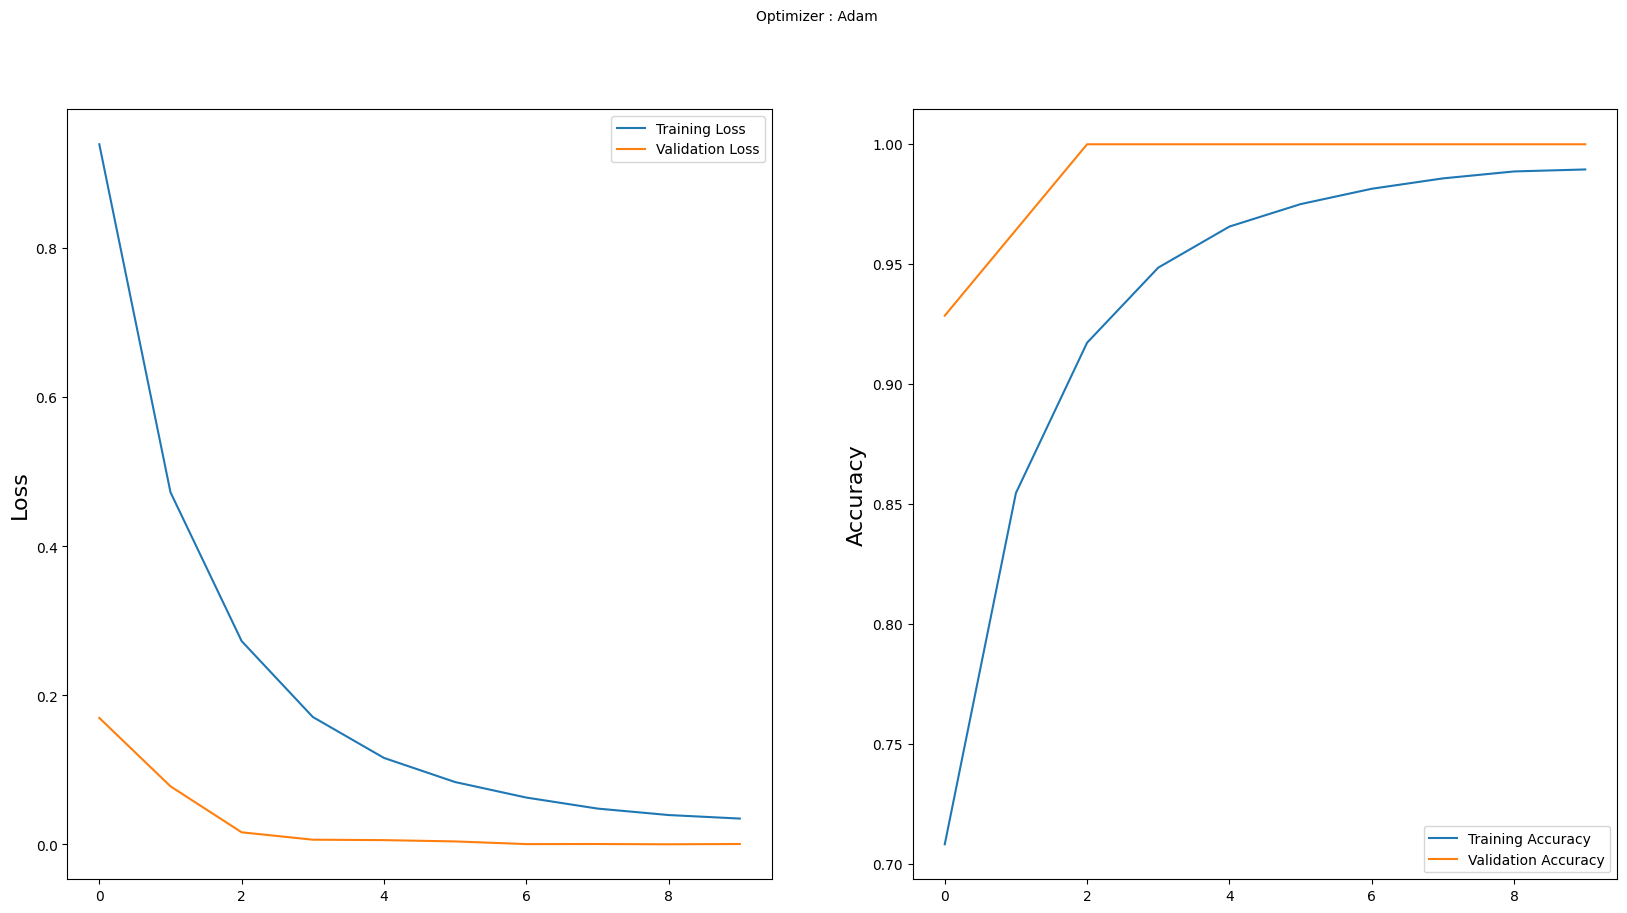

In [28]:
# plot change in loss and accuracy

import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
#Show predicition for one image

import tensorflow as tf
import cv2
import numpy as np


CATEGORIES = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z", "del", "nothing", "space"]


def prepare(filepath):
    IMG_SIZE = 48
    img_array = cv2.imread(filepath, cv2. IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1) 



model = tf.keras.models.load_model("data/checkpoints/full.model")

In [ ]:
prediction = model.predict([prepare("img")])

print(prediction)
print(CATEGORIES[int(np.argmax(prediction[0]))])